In [1]:
from google.colab import drive, files
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing libraries

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import skew
%matplotlib inline

# Reading Data

In [0]:
curr_path = "/content/drive/My Drive/DSWorkspace/HousePricePrediction"

In [0]:
#read data
train_data = pd.read_csv(curr_path+"/data/train.csv")
test_data = pd.read_csv(curr_path+"/data/test.csv")

# Describing Training Data

In [44]:
train_data_numeric = train_data.select_dtypes(exclude="object")
train_data_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
train_data_numeric.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [46]:
train_data_categorical = train_data.select_dtypes(include="object")
train_data_categorical.columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

All categorical variables will be one hot encoded

In [47]:
train_data_numeric.loc[:,train_data.nunique()<13].columns.values

array(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold',
       'YrSold'], dtype=object)

# Plots

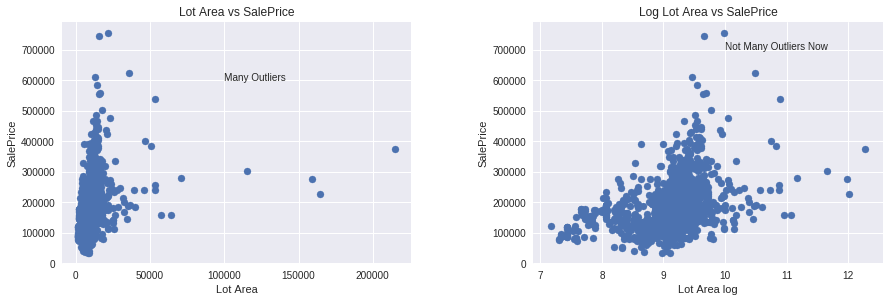

In [48]:
plt.subplot(122)
plt.xlabel("Lot Area log")
plt.ylabel("SalePrice")
plt.title("Log Lot Area vs SalePrice")
plt.text(10,700000,"Not Many Outliers Now")
plt.scatter(np.log(train_data["LotArea"]),train_data["SalePrice"])


plt.subplot(121)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")
plt.title("Lot Area vs SalePrice")
plt.scatter(train_data["LotArea"],train_data["SalePrice"])
plt.text(100000,600000,"Many Outliers")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
           


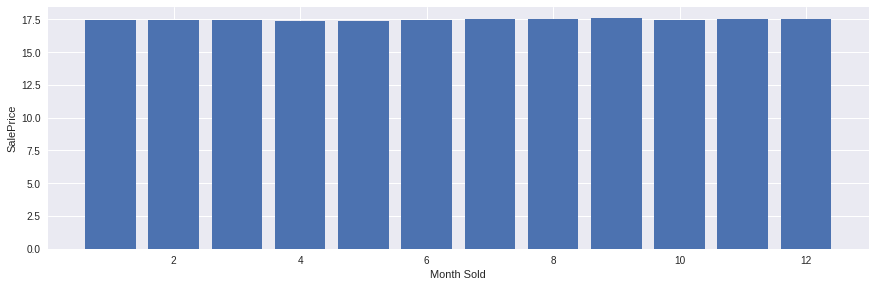

In [49]:
to_plot = train_data[["MoSold","SalePrice"]].copy().groupby("MoSold").mean().apply(lambda x : np.log2(x))
plt.subplot(111)
plt.xlabel("Month Sold")
plt.ylabel("SalePrice")
plt.bar(to_plot.index.values,to_plot.values[:,0])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

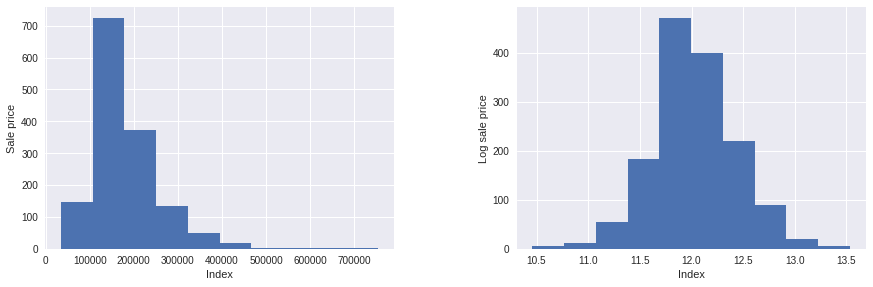

In [50]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(train_data["SalePrice"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")
plt.hist(np.log1p(train_data["SalePrice"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

Skewness is likely to create bias and hence lets do log transfor so that data is approximately normal and works well with multivariate linear regression

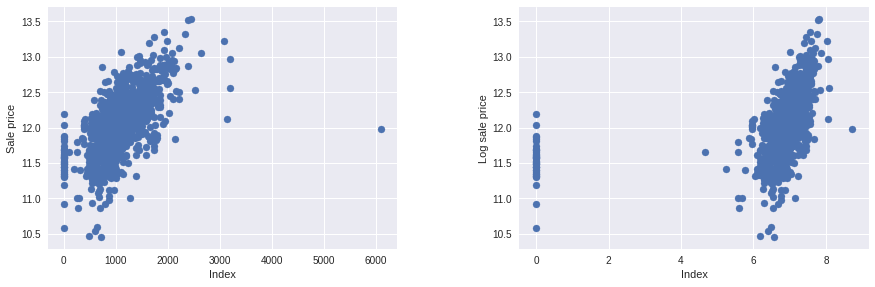

In [51]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.scatter(train_data["TotalBsmtSF"],np.log1p(train_data["SalePrice"]))

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")
plt.scatter(np.log1p(train_data["TotalBsmtSF"]),np.log1p(train_data["SalePrice"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

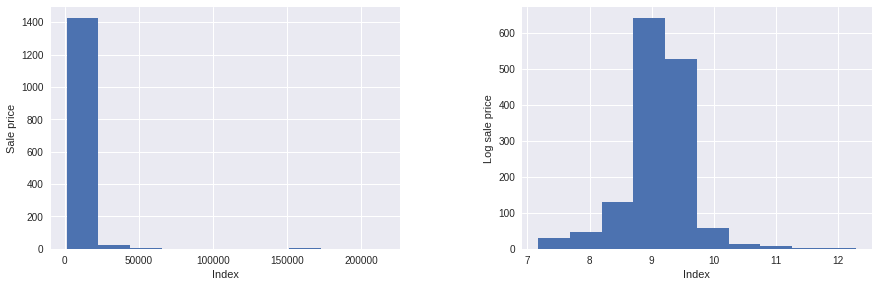

In [52]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(train_data["LotArea"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")
plt.hist(np.log1p(train_data["LotArea"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

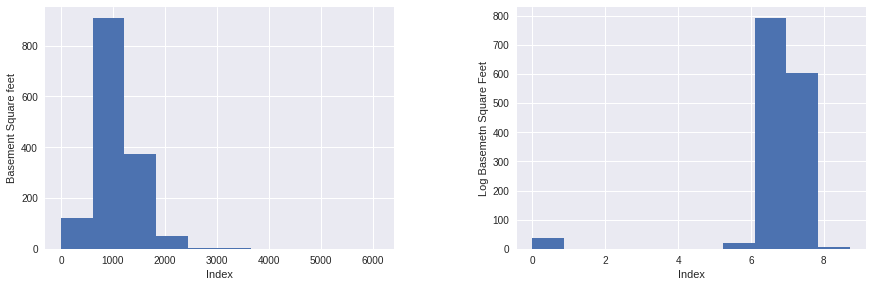

In [53]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Basement Square feet")
plt.hist(train_data["TotalBsmtSF"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log Basemetn Square Feet")
plt.hist(np.log1p(train_data["TotalBsmtSF"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

Looks like log transformation of numerical features removes skewness for those variables which are highly skewed.

In [0]:
# identify cat variables hidden as numerical
# convert categorical variables to dummy variables
# impute missing values using mean
# scale the data using power transformer
# log transform skewed features
  
def clean_train(train_to_clean):
    cont_vars = train_to_clean.select_dtypes(exclude="object").columns.values
    num_cat_vars = train_to_clean[cont_vars].loc[:,train_to_clean[cont_vars].nunique()<13].columns.values
    cont_vars = np.array([x for x in cont_vars.tolist() if x not in num_cat_vars.tolist()])

    skewd_feat = train_to_clean[cont_vars].apply(lambda x : skew(x,nan_policy='propagate'),axis=0)
    skewd_feat = skewd_feat[skewd_feat>0.7]
    train_to_clean[skewd_feat.index] = np.log1p(train_to_clean[skewd_feat.index])

    cat_vars = train_to_clean.select_dtypes(include="object").columns.values
    cat_vars = np.append(cat_vars,num_cat_vars)
    data_cat = pd.get_dummies(train_to_clean,columns=cat_vars)
    final = data_cat.set_index("Id")
    final = final.groupby(final.columns, axis = 1).transform(lambda x: x.fillna(x.mean())) 
    return final,skewd_feat
    
def clean_test(test_to_clean,transformed_train,skewd_feat):
    cont_vars = test_to_clean.select_dtypes(exclude="object").columns.values
    num_cat_vars = test_to_clean[cont_vars].loc[:,test_to_clean[cont_vars].nunique()<13].columns.values
    cont_vars = np.array([x for x in cont_vars.tolist() if x not in num_cat_vars.tolist()])
    test_to_clean[skewd_feat.index] = np.log1p(test_to_clean[skewd_feat.index])

    cat_vars = test_to_clean.select_dtypes(include="object").columns.values
    cat_vars = np.append(cat_vars,num_cat_vars)
    data_cat = pd.get_dummies(test_to_clean,columns=cat_vars)
    final = data_cat.set_index("Id")
    final = final.groupby(final.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    final = final.T.reindex(index = transformed_train.columns.values).fillna(0).T
    return final
  


    

In [0]:
def fitRidgeCV(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = RidgeCV(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictLassoCV(test_fit,clf):
    return clf.predict(test_fit)

In [0]:
def fitLassoCV(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = LassoCV(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictLassoCV(test_fit,clf):
    return clf.predict(test_fit)

In [0]:
target = np.log1p(train_data["SalePrice"])
train_cleaned,skewd_feat = clean_train(train_data.drop("SalePrice",axis=1))
test_cleaned = clean_test(test_data,train_cleaned,skewd_feat)


In [58]:
ridge_alpha = [0.05, 0.1, 0.3, 1, 3, 5, 6,7,7.5,8,8.5,9,10,11,12, 15, 30, 50, 75,100]
train_final = train_cleaned
test_final = test_cleaned
ridgeCV_model = fitRidgeCV(train_cleaned,target,normalize=False,alphas=ridge_alpha,store_cv_values = True)



train loss:test


In [59]:
lasso_alpha = [1, 0.5, 0.1, 0.02, 0.001, 0.0003,0.0004,0.0005]
train_final = train_cleaned
test_final = test_cleaned
lassoCV_model = fitLassoCV(train_cleaned,target,cv=5, random_state=0,normalize=False,alphas=lasso_alpha)

train loss:test


# Error plots for Ridge cross validation and lasso crossvalidation

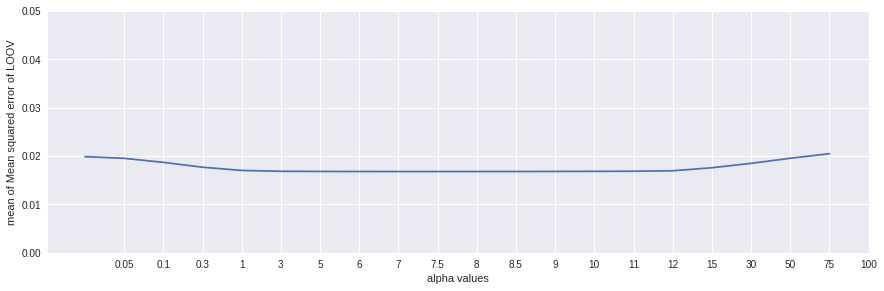

In [60]:
plt.plot(ridgeCV_model.cv_values_.mean(axis=0))
plt.xlabel("alpha values")
plt.ylabel("mean of Mean squared error of LOOV")
plt.ylim(0,0.05)
plt.xticks(range(1,len(ridge_alpha)+1),ridge_alpha)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.show()


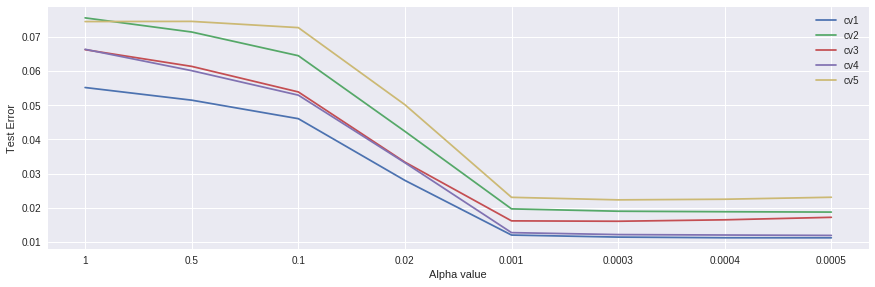

In [61]:
plt.plot(lassoCV_model.mse_path_)
plt.legend(["cv"+str(i) for i in range(1,lassoCV_model.mse_path_.shape[1]+1)])
plt.xticks(range(len(lasso_alpha)),lasso_alpha)
plt.xlabel("Alpha value")
plt.ylabel("Test Error")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.show()


In [0]:
ridge_output = ridgeCV_model.predict(test_cleaned)

In [0]:
lasso_output = lassoCV_model.predict(test_cleaned)

In [0]:
def writeoutput(output_df, filename, columns, index):
  csv_df = pd.DataFrame(output_df,columns=columns,index=index)
  csv_df.reset_index()
  csv_df.to_csv(filename)
  files.download(filename)

# Final Regression Equation and important predictors for House price prediction

In [73]:
lasso_coeff_values = lassoCV_model.coef_
lasso_coeff_values = pd.DataFrame(lasso_coeff_values,index=test_cleaned.columns.values)
lasso_coeff_values.sort_values(0)

,0
PoolArea_480,-0.338420
MSZoning_C (all),-0.336482
RoofMatl_ClyTile,-0.199597
OverallCond_3,-0.149552
Condition2_PosN,-0.138398
OverallQual_3,-0.090781
SaleCondition_Abnorml,-0.068009
OverallCond_4,-0.067599
Neighborhood_Edwards,-0.061718
Functional_Maj2,-0.051034


 We can see that Low Overall quality index and less pool area negatively effect the sale price of the house
 
 High overall quality rating of 10,9 and neighborhoods of Crawfor and StoneBr are postively associated with high sale prices

# Following code downloads predict sales prices for test data.

In [0]:
writeoutput(np.expm1(ridge_output),"ridgecv_output.csv",["SalePrice"],test_data["Id"])

In [0]:
writeoutput(np.expm1(lasso_output),"lassocv_output.csv", ["SalePrice"], test_data["Id"])

In [0]:
writeoutput(lasso_coeff_values.values,"Estimated_Coefficient_Values.csv", ["values"],lasso_coeff_values.index )